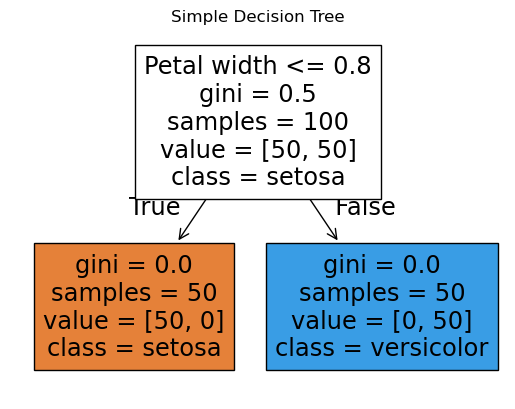

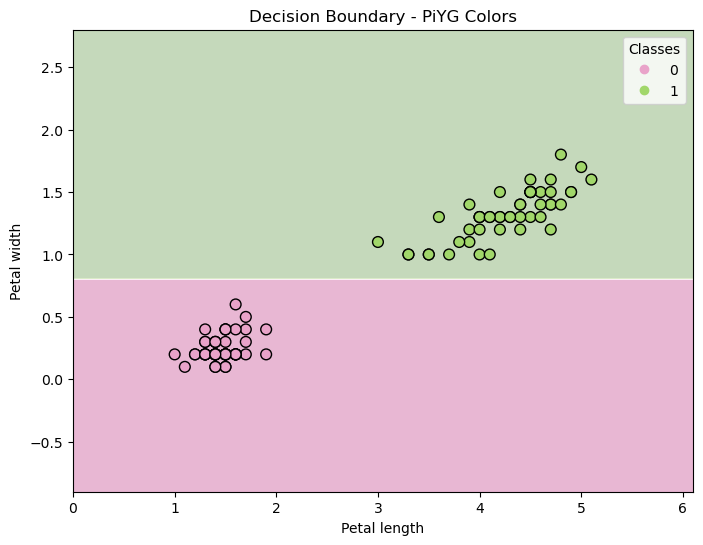

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Load Iris dataset (only Setosa and Versicolor)
iris = load_iris()
X = iris.data[:100, 2:]  # Petal length and width
y = iris.target[:100]

# Create and train decision tree
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X, y)


# Plot decision tree
plt.figure()
plot_tree(clf, filled=True, feature_names=["Petal length", "Petal width"], class_names=iris.target_names[:2])
plt.title("Simple Decision Tree")
plt.show()

# Function to plot decision boundary using PiYG colormap
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use PiYG colormap
    cmap_bg = plt.cm.PiYG
    cmap_pts = ListedColormap(['#e9a3c9', '#a1d76a'])  # Custom colors for points

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_bg, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_pts, edgecolor='k', s=60)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Plot decision boundary
plot_decision_boundary(clf, X, y)


Normal Tree Accuracy: 0.8333333333333334
Overfitting Tree Accuracy: 0.8


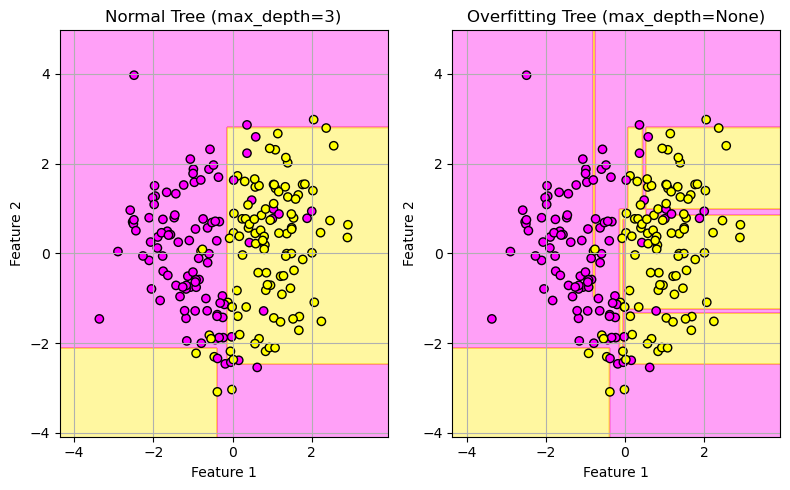

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate random data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Normal Tree (limit depth to prevent overfitting)
normal_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
normal_tree.fit(X_train, y_train)
y_pred_normal = normal_tree.predict(X_test)
acc_normal = accuracy_score(y_test, y_pred_normal)

# 2. Overfitting Tree (very deep, learns noise too)
overfit_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
overfit_tree.fit(X_train, y_train)
y_pred_overfit = overfit_tree.predict(X_test)
acc_overfit = accuracy_score(y_test, y_pred_overfit)

print("Normal Tree Accuracy:", acc_normal)
print("Overfitting Tree Accuracy:", acc_overfit)

# Plotting both
def plot_model(clf, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use spring colormap
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='spring')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='spring')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plot_model(normal_tree, "Normal Tree (max_depth=3)")

plt.subplot(1, 2, 2)
plot_model(overfit_tree, "Overfitting Tree (max_depth=None)")

plt.tight_layout()
plt.show()
